In [2]:
import pandas as pd
import shap
import xgboost
import sklearn
import time
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
shap.initjs()

In [3]:
data = pd.read_csv('titanic_data.csv')

In [4]:
data.sample(7)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
374,374,0,3,0,0,3,1,2,1,2
596,596,1,2,0,1,0,0,3,1,2
815,815,0,1,1,1,0,0,0,1,1
429,429,1,3,1,1,0,0,1,1,1
296,296,0,3,1,1,0,0,0,2,1
475,475,0,1,1,1,0,0,3,1,1
16,16,0,3,1,0,4,1,2,3,4


In [6]:
X = data.drop(['Survived','Unnamed: 0'],axis=1)
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.25)

# SHAP With Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model = log_model.fit(X_train,Y_train)


In [10]:
log_accuracy_train  = round(log_model.score(X_train, Y_train) * 100, 2)
log_accuracy_train 

80.54

In [26]:
explainer = shap.LinearExplainer(log_model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[5,:])

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


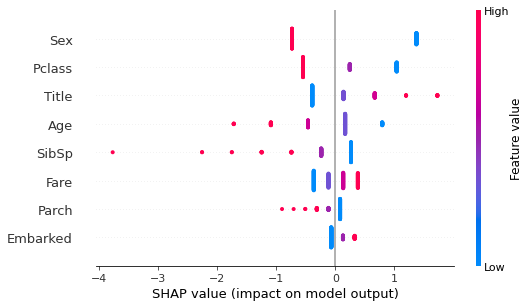

In [16]:
shap.summary_plot(shap_values, X_test)

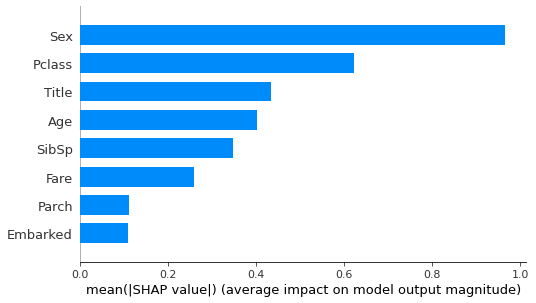

In [17]:
shap.summary_plot(shap_values,X_test,  plot_type="bar")

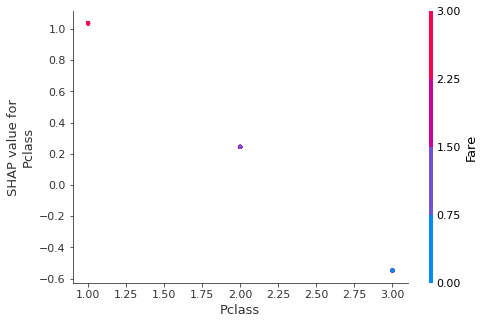

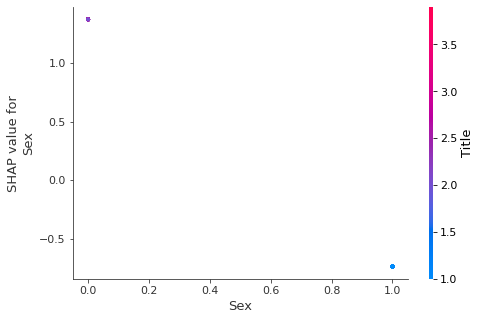

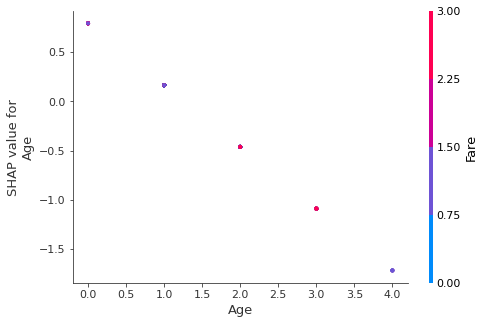

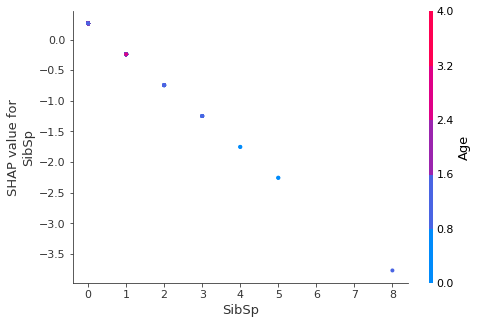

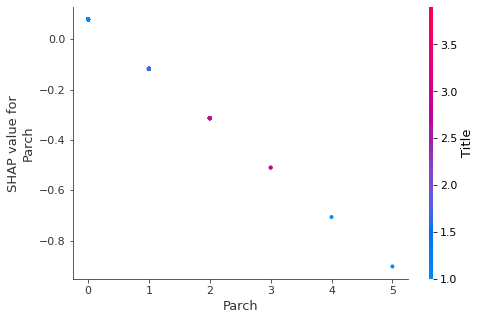

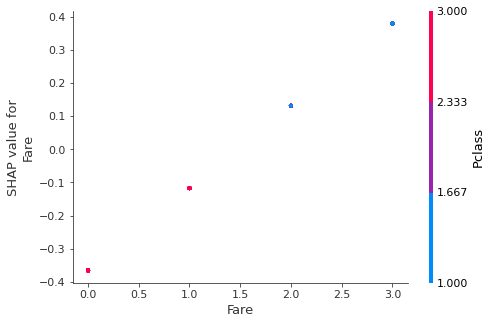

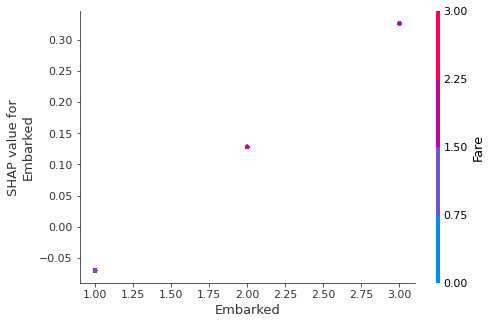

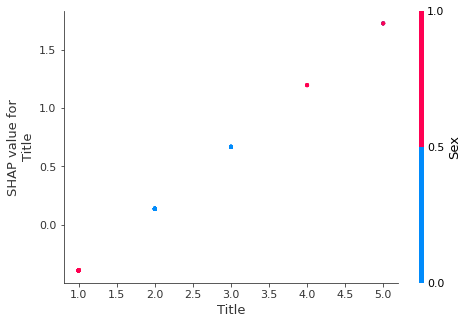

In [18]:
for column in X_test.columns:
    shap.dependence_plot(column, shap_values, X_test,)

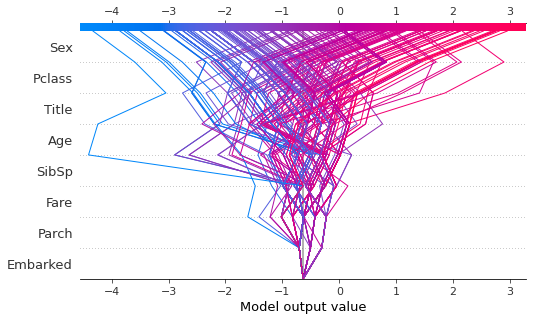

In [25]:
shap.decision_plot(explainer.expected_value, shap_values[::], X.iloc[0,:])

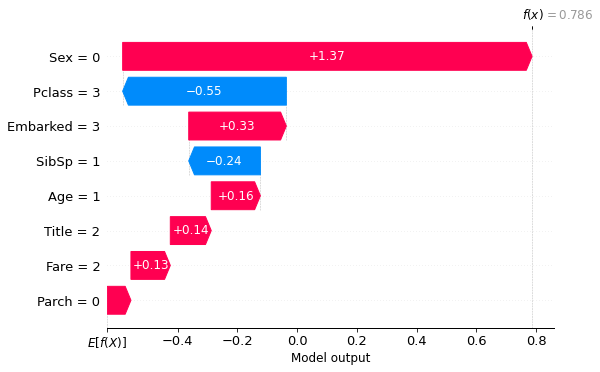

In [23]:
shap.waterfall_plot(explainer.expected_value, shap_values[2,:], X_test.iloc[2,:])  